In [65]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from subprocess import check_output
import base64
import urllib.parse
from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, grafico_dispersion_con_correlacion,plot_categorical_relationship_fin, \
plot_grouped_histograms
#from wordcloud import WordCloud, STOPWORDS

In [5]:
# Cargamos los datos del primer trimestre en un dataframe y vemos 5 líneas
df_q1 = pd.read_csv("./Datos_Naza/Airbnb_2025/listings_2025_03_05.csv.gz")
df_q1.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,21853,https://www.airbnb.com/rooms/21853,20250305023340,2025-03-11,city scrape,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,...,4.82,4.21,4.67,NaN,f,2,0,2,0,0.26
1,30320,https://www.airbnb.com/rooms/30320,20250305023340,2025-03-10,previous scrape,Great Vacational Apartments,NaN,NaN,https://a0.muscache.com/pictures/336868/f67409...,130907,...,4.78,4.90,4.69,NaN,f,3,3,0,0,0.96
2,30959,https://www.airbnb.com/rooms/30959,20250305023340,2025-03-10,previous scrape,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,NaN,https://a0.muscache.com/pictures/78173471/835e...,132883,...,4.63,4.88,4.25,NaN,f,1,1,0,0,0.07
3,40916,https://www.airbnb.com/rooms/40916,20250305023340,2025-03-10,previous scrape,Holiday Apartment Madrid Center,NaN,NaN,https://a0.muscache.com/pictures/336736/c3b486...,130907,...,4.79,4.88,4.55,NaN,f,3,3,0,0,0.28
4,62423,https://www.airbnb.com/rooms/62423,20250305023340,2025-03-12,city scrape,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...,DISTRICT WITH VERY GOOD VIBES IN THE MIDDLE OF...,https://a0.muscache.com/pictures/miso/Hosting-...,303845,...,4.85,4.97,4.58,NaN,f,3,1,2,0,2.73


In [ ]:
# Visualizamos las columnas 
df_q1.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [10]:
# Elegimos las columnas que serán interesantes para nuestro EDA (Extensible al resto de trimestres)
cols_keep = [
    "id",
    "last_scraped",
    "neighbourhood_group_cleansed",
    "neighbourhood_cleansed",
    "latitude",
    "longitude",
    "room_type",
    "property_type",
    "accommodates",
    "bedrooms",
    "bathrooms_text",
    "price",
    "minimum_nights",
    "availability_365",
    "number_of_reviews"
]

In [11]:
df_1trimestre = df_q1[cols_keep].copy()
df_1trimestre = df_1trimestre.rename(columns={
    "neighbourhood_group_cleansed": "Distrito",
    "neighbourhood_cleansed": "Barrio",
    "accommodates": "capacidad",})
df_1trimestre

,id,last_scraped,Distrito,Barrio,latitude,longitude,room_type,property_type,capacidad,bedrooms,bathrooms_text,price,minimum_nights,availability_365,number_of_reviews
0,21853,2025-03-11,Latina,Cármenes,40.403810,-3.741300,Private room,Private room in rental unit,1,1.0,1 bath,$29.00,4,233,33
1,30320,2025-03-10,Centro,Sol,40.414760,-3.704180,Entire home/apt,Entire rental unit,2,1.0,1 bath,NaN,5,0,172
2,30959,2025-03-10,Centro,Embajadores,40.412590,-3.701050,Entire home/apt,Entire loft,2,1.0,1 bath,NaN,3,0,8
3,40916,2025-03-10,Centro,Universidad,40.422470,-3.705770,Entire home/apt,Entire rental unit,3,1.0,1 bath,NaN,5,0,49
4,62423,2025-03-12,Centro,Justicia,40.418840,-3.696550,Private room,Private room in rental unit,4,1.0,1.5 shared baths,$77.00,1,298,227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25283,1368985680426539467,2025-03-12,Hortaleza,Canillas,40.464110,-3.647130,Entire home/apt,Entire rental unit,3,1.0,1 bath,$103.00,2,0,0
25284,1368986418960986344,2025-03-05,Carabanchel,San Isidro,40.395983,-3.730953,Entire home/apt,Entire rental unit,5,2.0,1 bath,$100.00,5,365,0
25285,1368991577357063431,2025-03-10,Carabanchel,San Isidro,40.395621,-3.731533,Entire home/apt,Entire rental unit,3,1.0,1 bath,$66.00,5,3,0
25286,1369034696848967860,2025-03-07,Carabanchel,Abrantes,40.383990,-3.727290,Shared room,Shared room in rental unit,1,1.0,1 shared bath,$16.00,1,71,0


In [12]:
df_q2 = pd.read_csv("./Datos_Naza/Airbnb_2025/listings_2025_06_12.csv.gz")

In [13]:
df_2trimestre = df_q2[cols_keep].copy()
df_2trimestre = df_2trimestre.rename(columns={
    "neighbourhood_group_cleansed": "Distrito",
    "neighbourhood_cleansed": "Barrio",
    "accommodates": "capacidad",})
df_2trimestre.head(5)

,id,last_scraped,Distrito,Barrio,latitude,longitude,room_type,property_type,capacidad,bedrooms,bathrooms_text,price,minimum_nights,availability_365,number_of_reviews
0,21853,2025-06-26,Latina,Cármenes,40.40381,-3.74130,Private room,Private room in rental unit,1,1.0,1 bath,$29.00,4,340,33
1,30320,2025-06-27,Centro,Sol,40.41476,-3.70418,Entire home/apt,Entire rental unit,2,1.0,1 bath,NaN,5,337,172
2,30959,2025-06-27,Centro,Embajadores,40.41259,-3.70105,Entire home/apt,Entire loft,2,1.0,1 bath,NaN,3,0,8
3,40916,2025-06-26,Centro,Universidad,40.42247,-3.70577,Entire home/apt,Entire rental unit,2,1.0,1 bath,NaN,5,352,49
4,62423,2025-06-25,Centro,Justicia,40.41884,-3.69655,Private room,Private room in rental unit,4,1.0,1.5 shared baths,$64.00,1,314,234


In [15]:
df_q3 = pd.read_csv("./Datos_Naza/Airbnb_2025/listings_2025_09_14.csv.gz")


In [16]:
df_3trimestre = df_q3[cols_keep].copy()
df_3trimestre = df_3trimestre.rename(columns={
    "neighbourhood_group_cleansed": "Distrito",
    "neighbourhood_cleansed": "Barrio",
    "accommodates": "capacidad",})
df_3trimestre.head(5)

,id,last_scraped,Distrito,Barrio,latitude,longitude,room_type,property_type,capacidad,bedrooms,bathrooms_text,price,minimum_nights,availability_365,number_of_reviews
0,21853,2025-09-15,Latina,Cármenes,40.40381,-3.74130,Private room,Private room in rental unit,1,NaN,1 bath,NaN,4,198,33
1,30320,2025-09-15,Centro,Sol,40.41476,-3.70418,Entire home/apt,Entire rental unit,2,1.0,1 bath,$157.00,5,342,173
2,30959,2025-09-15,Centro,Embajadores,40.41259,-3.70105,Entire home/apt,Entire loft,2,1.0,1 bath,NaN,3,0,8
3,40916,2025-09-15,Centro,Universidad,40.42247,-3.70577,Entire home/apt,Entire rental unit,2,1.0,1 bath,$143.00,5,341,53
4,62423,2025-09-15,Centro,Justicia,40.41884,-3.69655,Private room,Private room in rental unit,4,1.0,1.5 shared baths,$65.00,1,299,249


In [18]:
df_alquileres = pd.concat([df_1trimestre, df_2trimestre, df_3trimestre], ignore_index=True)
df_alquileres.head(10)

,id,last_scraped,Distrito,Barrio,latitude,longitude,room_type,property_type,capacidad,bedrooms,bathrooms_text,price,minimum_nights,availability_365,number_of_reviews
0,21853,2025-03-11,Latina,Cármenes,40.40381,-3.74130,Private room,Private room in rental unit,1,1.0,1 bath,$29.00,4,233,33
1,30320,2025-03-10,Centro,Sol,40.41476,-3.70418,Entire home/apt,Entire rental unit,2,1.0,1 bath,NaN,5,0,172
2,30959,2025-03-10,Centro,Embajadores,40.41259,-3.70105,Entire home/apt,Entire loft,2,1.0,1 bath,NaN,3,0,8
3,40916,2025-03-10,Centro,Universidad,40.42247,-3.70577,Entire home/apt,Entire rental unit,3,1.0,1 bath,NaN,5,0,49
4,62423,2025-03-12,Centro,Justicia,40.41884,-3.69655,Private room,Private room in rental unit,4,1.0,1.5 shared baths,$77.00,1,298,227
5,70059,2025-03-06,Centro,Universidad,40.42381,-3.71038,Entire home/apt,Entire rental unit,2,1.0,1 bath,$66.00,15,54,61
6,70310,2025-03-06,Centro,Universidad,40.42252,-3.70250,Entire home/apt,Entire rental unit,2,1.0,1 bath,$89.00,30,289,29
7,72150,2025-03-12,Centro,Embajadores,40.41150,-3.70449,Entire home/apt,Entire rental unit,6,3.0,1 bath,$173.00,3,163,126
8,82481,2025-03-12,Salamanca,Recoletos,40.42342,-3.68123,Entire home/apt,Entire rental unit,2,1.0,1 bath,NaN,3,0,105
9,84719,2025-03-08,Centro,Embajadores,40.40866,-3.70374,Entire home/apt,Entire rental unit,2,1.0,1 bath,$72.00,7,53,184


In [19]:
df_alquileres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76292 entries, 0 to 76291
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 76292 non-null  int64  
 1   last_scraped       76292 non-null  object 
 2   Distrito           76292 non-null  object 
 3   Barrio             76292 non-null  object 
 4   latitude           76292 non-null  float64
 5   longitude          76292 non-null  float64
 6   room_type          76292 non-null  object 
 7   property_type      76292 non-null  object 
 8   capacidad          76292 non-null  int64  
 9   bedrooms           68775 non-null  float64
 10  bathrooms_text     76209 non-null  object 
 11  price              58307 non-null  object 
 12  minimum_nights     76292 non-null  int64  
 13  availability_365   76292 non-null  int64  
 14  number_of_reviews  76292 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 8.7+ MB


In [26]:
df_all2 = df_all.copy()

df_all2["last_scraped"] = pd.to_datetime(df_all2["last_scraped"], errors="coerce")

df_all2 = (df_all2.sort_values("last_scraped").drop_duplicates(subset=["id"], keep="last").reset_index(drop=True))

df_all2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31231 entries, 0 to 31230
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 31231 non-null  int64         
 1   last_scraped       31231 non-null  datetime64[ns]
 2   Distrito           31231 non-null  object        
 3   Barrio             31231 non-null  object        
 4   latitude           31231 non-null  float64       
 5   longitude          31231 non-null  float64       
 6   room_type          31231 non-null  object        
 7   property_type      31231 non-null  object        
 8   capacidad          31231 non-null  int64         
 9   bedrooms           28286 non-null  float64       
 10  bathrooms_text     31194 non-null  object        
 11  price              24062 non-null  object        
 12  minimum_nights     31231 non-null  int64         
 13  availability_365   31231 non-null  int64         
 14  number

Vamos a ver los nulos del dataframe

In [ ]:
df_alquileres.isna().sum().sort_values(ascending=False)

price                17985
bedrooms              7517
bathrooms_text          83
Barrio                   0
id                       0
last_scraped             0
Distrito                 0
room_type                0
longitude                0
latitude                 0
capacidad                0
property_type            0
minimum_nights           0
availability_365         0
number_of_reviews        0
dtype: int64

Vemos que la columna price, bedrooms y bathrooms_text son las que preesentan valores nulos.
<br>Comenzamos por la columna bathrooms_text que indica la cantidad de baños de la vivienda

In [23]:
df_alquileres.bathrooms_text.describe()

count      76209
unique        38
top       1 bath
freq       38546
Name: bathrooms_text, dtype: object

In [27]:
print(df_alquileres.bathrooms_text.mode())
df_alquileres.bathrooms_text.value_counts(dropna=False)

0    1 bath
Name: bathrooms_text, dtype: object


bathrooms_text
1 bath               38546
2 baths              10946
1 shared bath        10162
1 private bath        5607
1.5 baths             2360
2 shared baths        1931
3 baths               1575
1.5 shared baths      1280
2.5 baths              633
3 shared baths         508
Shared half-bath       454
4 baths                340
0 baths                306
Half-bath              298
0 shared baths         234
3.5 baths              163
Private half-bath      148
2.5 shared baths       145
4 shared baths         130
5 baths                 98
NaN                     83
4.5 baths               71
5 shared baths          57
6 shared baths          46
6 baths                 33
3.5 shared baths        26
4.5 shared baths        22
8 shared baths          21
5.5 baths               16
7 shared baths          12
7 baths                 10
8 baths                 10
6.5 baths                6
10 baths                 4
15 baths                 3
14 baths                 3
19 baths     

En este caso al ser 83 nulos, bien podemos considerar si la columna nos aporta información relevante o no y optar por descartarla del dataframe o asignarle el valor más repetido que sería "1 bath"
<br>Optamos por la segunda opción

In [28]:
moda_bathroomstext = df_alquileres.bathrooms_text.mode()[0]

In [29]:
df_alquileres.loc[df_alquileres.bathrooms_text.isna(),"bathrooms_text"] = moda_bathroomstext
df_alquileres.isna().sum().sort_values(ascending=False)


price                17985
bedrooms              7517
id                       0
Barrio                   0
latitude                 0
last_scraped             0
Distrito                 0
room_type                0
longitude                0
capacidad                0
property_type            0
bathrooms_text           0
minimum_nights           0
availability_365         0
number_of_reviews        0
dtype: int64

Ahora revisamos la columna bedrooms y su distribución

In [72]:
df_alquileres.bedrooms.value_counts(dropna=False)

bedrooms
1.0     49612
2.0     15074
3.0      5357
0.0      4127
4.0      1330
5.0       416
6.0       179
7.0        83
8.0        38
9.0        21
18.0       16
10.0       15
11.0       11
12.0        4
13.0        3
15.0        3
25.0        3
Name: count, dtype: int64

En este caso también podemos o bien eliminar las filas con nulos o completarlos con el valor más repetido que es 1.0
Vamos a optar también por sustituir por el valor más repetido aunque no sea correcto del todo, para no eliminar tantos registros

In [36]:
moda_bedrooms = df_alquileres.bedrooms.mode()[0]
df_alquileres.loc[df_alquileres.bedrooms.isna(),"bedrooms"] = moda_bedrooms
df_alquileres.isna().sum().sort_values(ascending=False)

price                17985
last_scraped             0
id                       0
Barrio                   0
latitude                 0
longitude                0
Distrito                 0
room_type                0
property_type            0
bedrooms                 0
capacidad                0
bathrooms_text           0
minimum_nights           0
availability_365         0
number_of_reviews        0
dtype: int64

Por último, lo haremos con price

In [ ]:
''' Vemos que price tiene el símbolo $ en sus valores, por lo que no es numérico si no string
convertimos a float y eliminamos los carácteres extraños'''
df_alquileres.price.describe()
df_alquileres["price"] = (
    df_alquileres["price"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)
df_alquileres.price.describe()

count    58307.000000
mean       146.891677
std        471.294850
min          0.000000
25%         66.000000
50%        102.000000
75%        152.000000
max      32000.000000
Name: price, dtype: float64

In [ ]:
# Miramos los nulos totales
df_alquileres.price.value_counts(dropna=False)


price
NaN      17985
90.0       645
80.0       583
100.0      580
50.0       564
         ...  
668.0        1
889.0        1
699.0        1
837.0        1
631.0        1
Name: count, Length: 912, dtype: int64

In [ ]:
# Miramos los nulos por Barrio para sustituir por la media de cada barrio
df_alquileres.groupby("Barrio")["price"].apply(lambda x: x.isna().sum())


Barrio
Abrantes         36
Acacias         231
Adelfas         112
Aeropuerto        9
Aguilas          52
               ... 
Valverde         77
Ventas          176
Vinateros        49
Vista Alegre    167
Zofío            58
Name: price, Length: 128, dtype: int64

In [55]:
df_alquileres.groupby("Barrio")["price"].mean().round(2)


Barrio
Abrantes         51.68
Acacias          97.85
Adelfas         108.33
Aeropuerto       84.64
Aguilas          60.09
                 ...  
Valverde         96.70
Ventas          105.97
Vinateros        40.38
Vista Alegre     70.43
Zofío            67.08
Name: price, Length: 128, dtype: float64

In [56]:
# De esta forma rellenamos los nulos de cada barrio por su media correspondiente
df_alquileres["price"] = df_alquileres["price"].fillna(
    df_alquileres.groupby("Barrio")["price"].transform("mean").round(2)
)

In [57]:
df_alquileres.isna().sum().sort_values(ascending=False)

id                   0
last_scraped         0
Distrito             0
Barrio               0
latitude             0
longitude            0
room_type            0
property_type        0
capacidad            0
bedrooms             0
bathrooms_text       0
price                0
minimum_nights       0
availability_365     0
number_of_reviews    0
dtype: int64

Con esto hemos elimiado todos los valores nulos de nuestro dataframe

RELACION PRECIO - DISPONIBILIDAD

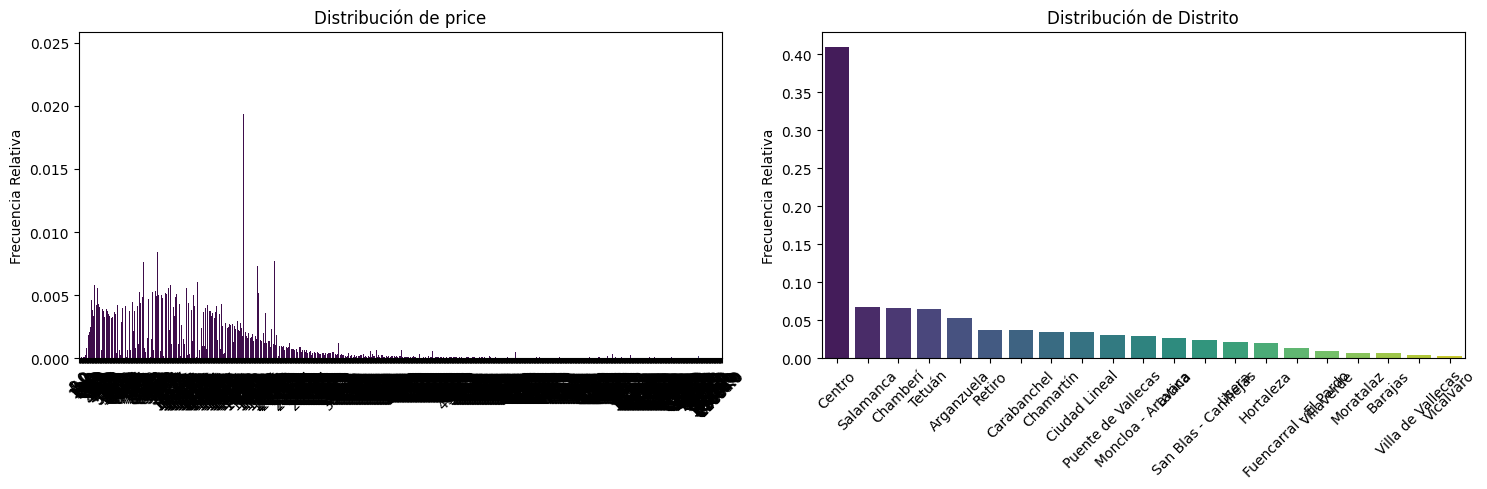

In [64]:
pinta_distribucion_categoricas(df_alquileres,["price","Distrito"], relativa= True)

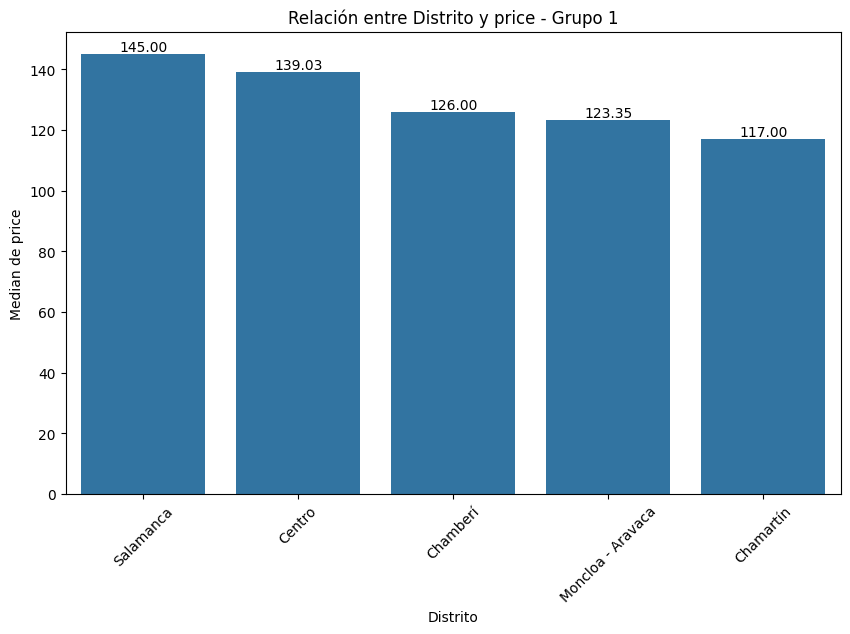

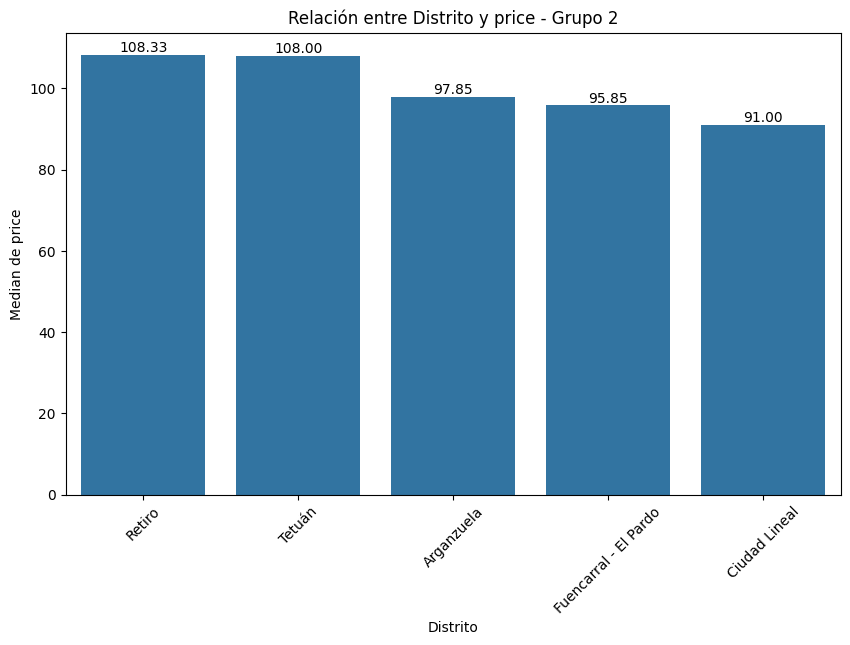

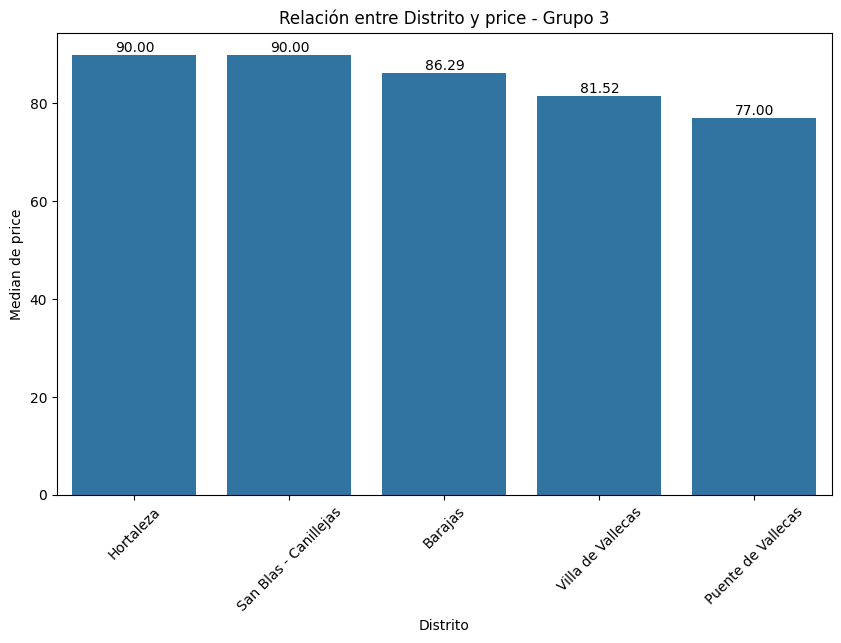

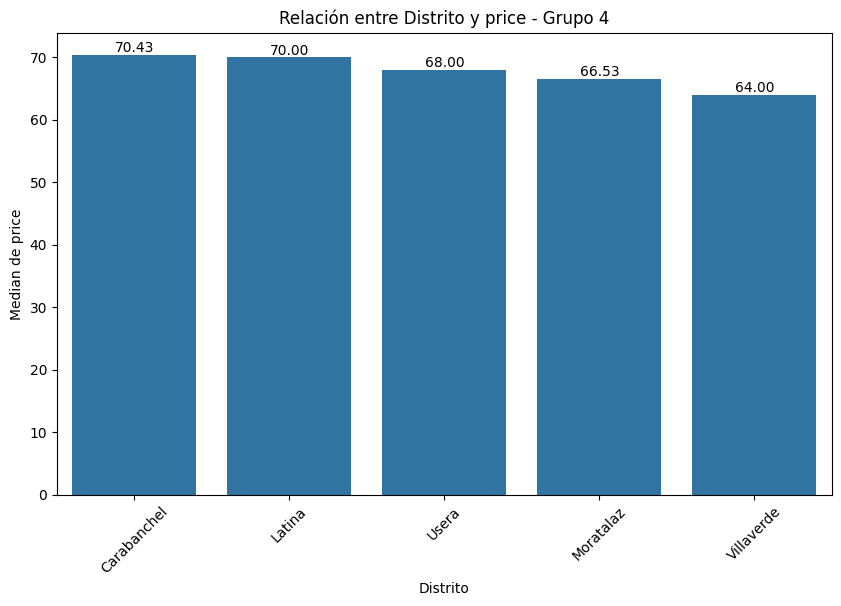

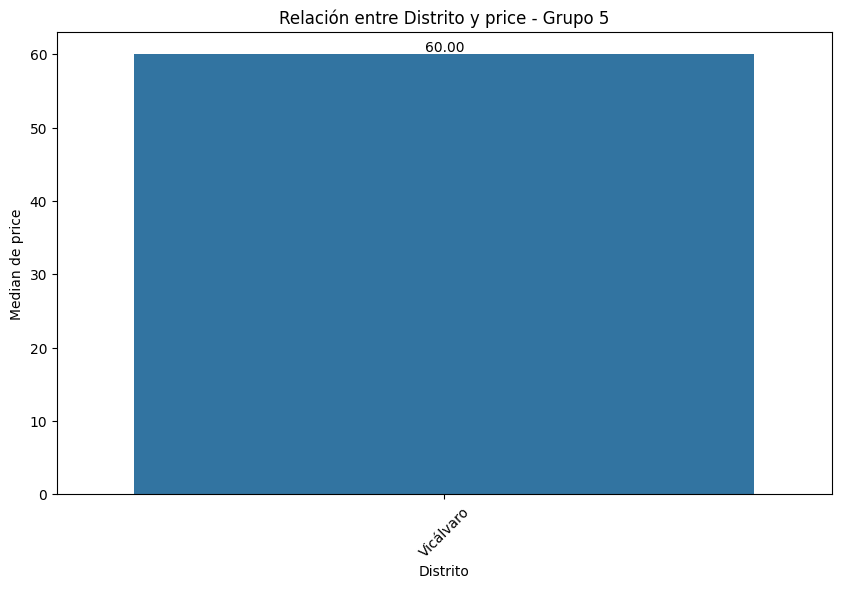

In [69]:
plot_categorical_numerical_relationship(df_alquileres,"Distrito","price",show_values=True, measure = "median")

In [71]:
df_alquileres.groupby("Distrito")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
Distrito,,,,,,,,
Arganzuela,4006.0,117.915225,239.112047,8.0,74.00,97.85,128.19,8698.0
Barajas,514.0,101.329533,112.716904,7.0,57.00,86.29,114.75,1500.0
Carabanchel,2781.0,85.444196,91.578653,8.0,48.00,70.43,95.91,1184.0
Centro,31210.0,168.670722,450.428762,8.0,93.00,139.03,182.00,32000.0
Chamartín,2660.0,127.320827,95.785948,17.0,85.00,117.00,144.00,1522.0
Chamberí,5043.0,138.151057,159.219958,10.0,87.00,126.00,156.01,6866.0
Ciudad Lineal,2584.0,107.134872,200.374399,0.0,56.00,91.00,109.00,6375.0
Fuencarral - El Pardo,1012.0,109.024832,129.723055,19.0,62.75,95.85,105.78,1700.0
Hortaleza,1544.0,145.628400,404.852797,9.0,65.00,90.00,130.00,8000.0
